# Mushroom Observer EDA
There are two datasets that will potentially be combined. The bigger one is from the Mushroom Observer (MO), and the second one is from the Danish Museum of Natural History. We will only explore MO data here. 

In [5]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
table_dir = '../MO_tables/'

observations = pd.read_csv(table_dir + 'observations.csv', sep='\t')
images = pd.read_csv(table_dir + 'images.csv', sep='\t')
locations = pd.read_csv(table_dir + 'locations.csv', sep='\t')
names = pd.read_csv(table_dir + 'names.csv', sep='\t')

In [9]:
display(observations)

,id,user_id,name_id,location_id,lat,long,alt,is_collection_location,vote_cache,when,thumb_image_id,lifeform,classification
0,1,1.0,2.0,214.0,NaN,NaN,NaN,1.0,1.923350,2004-07-13,1.0,,Domain: _Eukarya_
1,\nKingdom: _Fungi_,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,\nPhylum: _Ascomycota_,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,\nClass: _Sordariomycetes_,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,\nOrder: _Xylariales_,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,\nFamily: _Xylariaceae_,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2,1.0,3.0,53.0,NaN,NaN,NaN,1.0,2.706040,2004-07-17,2.0,,NaN
7,3,1.0,4.0,60.0,NaN,NaN,NaN,1.0,2.499910,2002-01-08,3.0,,NaN
8,4,1.0,4.0,5.0,NaN,NaN,NaN,1.0,2.499910,1996-01-15,4.0,,NaN
9,5,1.0,5.0,36.0,NaN,NaN,NaN,1.0,1.666610,2002-12-28,5.0,,Domain: _Eukarya_


Right away I see some weird entries. I think when the full taxa information is included, read_csv takes the new line character to mean new observation. The id, however, is a way to differentiate those. 

In [10]:
real_observations = observations.id.apply(lambda x: unicode(x).isnumeric())
display(observations[real_observations])

,id,user_id,name_id,location_id,lat,long,alt,is_collection_location,vote_cache,when,thumb_image_id,lifeform,classification
0,1,1.0,2.0,214.0,NaN,NaN,NaN,1.0,1.923350,2004-07-13,1.0,,Domain: _Eukarya_
6,2,1.0,3.0,53.0,NaN,NaN,NaN,1.0,2.706040,2004-07-17,2.0,,NaN
7,3,1.0,4.0,60.0,NaN,NaN,NaN,1.0,2.499910,2002-01-08,3.0,,NaN
8,4,1.0,4.0,5.0,NaN,NaN,NaN,1.0,2.499910,1996-01-15,4.0,,NaN
9,5,1.0,5.0,36.0,NaN,NaN,NaN,1.0,1.666610,2002-12-28,5.0,,Domain: _Eukarya_
15,6,1.0,61758.0,58.0,NaN,NaN,NaN,1.0,2.505280,2002-01-08,6.0,,NaN
16,7,1.0,6.0,58.0,NaN,NaN,NaN,0.0,2.499910,2005-01-07,7.0,,NaN
17,8,1.0,6.0,39.0,NaN,NaN,NaN,1.0,2.451440,2004-11-26,8.0,,NaN
18,9,1.0,7.0,69.0,NaN,NaN,NaN,1.0,2.499910,2003-01-03,9.0,,NaN
19,10,1.0,43604.0,38.0,NaN,NaN,NaN,1.0,2.321010,2002-01-05,11.0,,NaN


## Missing Values

Let's see how many entries we have left, and how many missing entries per category we have. 

In [11]:
obs = observations[real_observations]
no_entries = obs.shape[0]
missing_fields = {'no_entries':no_entries}
for field_names in obs.columns:
    if field_names not in ['id','when','lifeform','classification']:
        missing_fields[field_names] = no_entries \
                - obs[field_names].apply(lambda x: np.isnan(x)).sum()

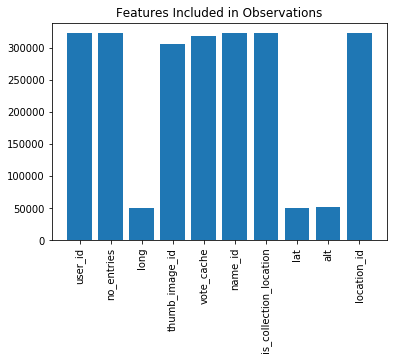

In [12]:
plt.bar(range(len(missing_fields)),
        list(missing_fields.values()), align='center')
plt.xticks(range(len(missing_fields)),
           list(missing_fields.keys()), rotation=90)
plt.title('Features Included in Observations')
plt.show()

Longitude, latitude and altitude are missing for a lot pictures. Otherwise, seems OK. Let's see what our other tables look like

## Downloading Images from Server

Let's try downloading all the pictures of a given species

In [66]:
#sample mushroom
my_name_id = 10
image_names = obs[obs.name_id == my_name_id].thumb_image_id.values
def generate_url_image_API(image_names):
    return ['https://images.mushroomobserver.org/960/' + str(int(w)) + '.jpg' \
                     for w in image_names if not np.isnan(w)]

In [68]:
import requests

def download_pictures(url_addresses):
    for i, url in enumerate(url_addresses):
        r = requests.get(url, allow_redirects=True)
        open('../pics/test' + str(i) + '.jpg', 'wb').write(r.content)
    return

Cool, the above worked well. We can now scroll thru the different species pictures. Now let's get a sense of how many classes have how many examples in this library.

## Number of Images per Class

In [33]:
unique_species = sorted(list(set(obs.name_id)))
total_species = np.zeros([len(unique_species)])
for i, species in enumerate(unique_species):
    image_names = obs[obs.name_id == species].thumb_image_id.values
    total_species[i] = sum([not np.isnan(w) for w in image_names])


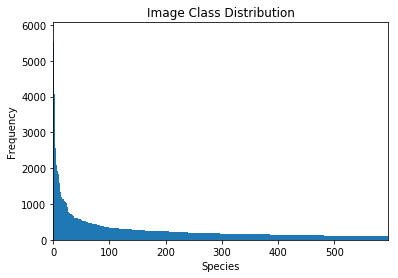

In [45]:
total_species = np.array(total_species)
total_species = sorted(total_species[total_species>100], reverse=True)
plt.bar(range(len(total_species)), total_species, width = 1)
plt.title('Image Class Distribution')
plt.ylabel('Frequency')
plt.xlabel('Species')
plt.xlim([0, len(total_species)])
plt.ylim([0, int(max(total_species) * 1.1)])
plt.show()

We have more than 500 classes with at least 100 images. We will have to determine at some point what the minimum number of images we'll want for us to keep a class. If we're using trasnfer learning, supposedly we can get away with fewer, but we'll see how it works out. 

## Species Vote Confidence Distribution

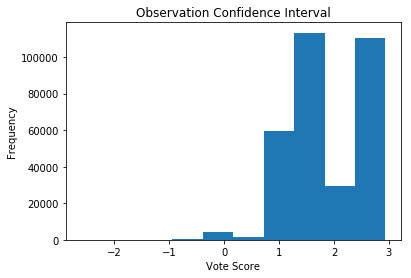

Total observations: 322830
 Removing negative confidence ones:314199


In [54]:
#let's check distribution of vote caches
votes = obs.vote_cache[[not np.isnan(w) for w in obs.vote_cache]]
plt.hist(votes)
plt.xlabel('Vote Score')
plt.ylabel('Frequency')
plt.title('Observation Confidence Interval')
plt.show()
print('Total observations: %i\nRemoving negative confidence ones: %i'
       %(obs.shape[0], obs[obs.vote_cache>0].shape[0]))

## Linking Image and Observation Tables
I'm still a bit confused as to why the images table is like 5 times bigger than the observations table. I'm going to see how many of the thumb_image_id numbers are actually on the images table

In [58]:
images_observation = set(obs.thumb_image_id)
images_claim = set(images.image_id)

In [56]:
appears_in_both_tables = \
        list(set(obs.thumb_image_id).intersection(set(images.image_id)))

In [71]:
appears_only_in_images = list(images_claim.difference(images_observation))

In [74]:
appears_only_in_observations = \
            list(images_observation.difference(images_claim))

In [75]:
print('total number of observations: %i' %obs.shape[0])
print('total number of image entries: %i'%images.shape[0])
print('total number of matching image entries: %i'\
                                  %len(appears_in_both_tables))

#these seem to exist
print('total number of image entries that are not observations: %i' \
                                  %len(appears_only_in_images))

#these actually don't seem to be there
print('total number of observations that dont appear in images: %i' \
                                 %len(appears_only_in_observations))

urls = generate_url_image_API(appears_only_in_observations[:10])
download_pictures(urls)

total number of observations: 322830
total number of image entries: 933010
total number of matching image entries: 305278
total number of image entries that are not observations: 626384
total number of observations that dont appear in images: 17209
